# Lab 01 - Spherical to Cartesian
### CE597 - Mapping Projection and Geometric Geodesy

*Kevan Tissue*  
*Geomatics Engineering*  
*Lyles School of Civil Engineering*  
*Purdue University*

### Importing necessary modules

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot figures inside the notebook
%matplotlib inline

### Lab Description:
1. Select 11 points on Earth, including the North Pole, the South Pole, my place of birth, and at least one location from each of Earth's eight octants.  
2. Calculate Earth-fixed geocentric cartesian coordinates from the spherical coordinates.
3. Add +1.50000 arcsecond to longitude and latitude and +50 meter to the height, then re-calculate the cartesian coordinates.
4. Compute the cartesian coordinate difference (dx, dy, dz) between step 2 and step 3, then compare them to the spherical coordinate difference.  

### Initializing variables

- $\rho \rightarrow$ conversion factor from radian to degree
- $rad \rightarrow$ conversion factor from degree to radian
- $\alpha \rightarrow$ angle measurement from center of Earth
- $R \rightarrow$ radius of the Earth (approximately 6371 km)
- $s \rightarrow$ arc length at surface of Earth
- $\lambda \rightarrow$ longitude angle
- $\psi \rightarrow$ latitude angle
- $h^s \rightarrow$ height above sphere 

In [2]:
rho = 180/math.pi
rad = math.pi/180
R = 6371 * 1000  # radius of Earth in meters

### Finding millimeter accuracy for DMS

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s = R \alpha$

*__Solving for $s$ by manipulating $\alpha$:__*

In [3]:
alpha = 0.00001/3600 * rad  # angle in arcseconds (converted to radians)
s = (R * alpha)*1000 # arc length in millimeters
print('s =', '%.10f' % s, 'mm')  

s = 0.3088747962 mm


*__Solving for $\alpha$ by manipulating $s$:__*

In [4]:
s = 1.0 # arc length in millimeters
alpha = (s / (1000 * R)) * rho * 3600
print('\u03B1 = ', '%.10f' % alpha, '°') 

α =  0.0000323756 °


Based on the above calculations, arcseconds should be displayed to 5 decimal places to ensure millimeter accuracy.

_______

## <span style="color:blue">*PART 1*<span>

### Location Selection:
1. North Pole 
2. South Pole 
3. PoB: Humana Hospital, New Orleans, LA
4. Tāne Mahuta, Waipoua Kauri Forest, NZ
5. Denali, Alaska 
6. Mount Fitz Roy, Argentina 
7. Purdue Engineering Fountain, W. Lafayette, IN
8. Cradle of Humankind, Gauteng, South Africa 
9. Eiffel Tower, Paris, France 
10. Sydney Opera House, Sydney, Australia 
11. Angkor Wat, Krong Siem Reap, Cambodia 

###### 1. North Pole 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 90° 00' 00.0000" N, 00° 00' 00.0000" E  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -13,980 ft

In [5]:
lon1 = [0, 0, 0.00000] # Longitude
lat1 = [90, 0, 0.00000] # Latitude
h1 = -13980 * 0.3048 # Height(m)

###### 2. South Pole 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 90° 00' 00.0000" S, 00° 00' 00.0000" E  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 9,301 ft

In [6]:
lon2 = [0, 0, 0.00000] # Longitude
lat2 = [-90, -0, -0.00000] # Latitude
h2 = 9301 * 0.3048 # Height(m)

###### 3. Place of Birth: Humana Hospital, New Orleans, LA 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 30° 02' 36.78024" N, 89° 57' 12.38369" W  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0 ft

In [7]:
lon3 = [-89, -57, -12.38369] # Longitude
lat3 = [30, 2, 36.78024] # Latitude
h3 = 0 * 0.3048 # Height(m)

Octant 1: N 0 to 90° E  
Octant 2: N 90 to 180° E  
Octant 3: N 180 to 90° W  
Octant 4: N 90 to 0° W  
Octant 5: S 0 to 90° E  
Octant 6: S 90 to 180° E  
Octant 7: S 180 to 90° W  
Octant 8: S 90 to 0° W  

###### 4. Eiffel Tower, Paris, France 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 48° 51′ 29.64298″ N, 02° 17′ 40.20111″ E  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 113 ft

In [8]:
lon4 = [2, 17, 40.20111] # Longitude
lat4 = [48, 51, 29.64298] # Latitude
h4 = 113 * 0.3048 # Height(m)

###### 5. Angkor Wat, Krong Siem Reap, Cambodia 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 13° 24′ 45.08764" N, 103° 52′ 00.43521" E  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 213 ft

In [9]:
lon5 = [103, 52, 0.43521] # Longitude
lat5 = [13, 24, 45.08764] # Latitude
h5 = 213 * 0.3048 # Height(m)

###### 6. Denali, Alaska 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 63° 04' 10.20103" N, 151° 00' 26.64532" W  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 20,308 ft

In [10]:
lon6 = [-151, -0, -26.64532] # Longitude
lat6 = [63, 4, 10.20103] # Latitude
h6 = 20308 * 0.3048 # Height(m)

###### 7. Purdue Engineering Fountain, W. Lafayette, IN
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 40° 25′ 43.10224″ N, 86° 54′ 49.61418″ W  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 623 ft

In [11]:
lon7 = [-86, -54, -49.61418] # Longitude
lat7 = [40, 25, 43.10224] # Latitude
h7 = 623 * 0.3048 # Height(m)

###### 8. Cradle of Humankind, Gauteng, South Africa 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 25° 55' 31.39308" S, 27° 46' 02.57003" E  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4,861 ft

In [12]:
lon8 = [27, 46, 2.57003] # Longitude
lat8 = [-25, -55, -31.39308] # Latitude
h8 = 4861 * 0.3048 # Height(m)

###### 9. Sydney Opera House, Sydney, Australia 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 33° 51′ 31.09981″ S, 151° 12′ 51.01352" E  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 13 ft

In [13]:
lon9 = [151, 12, 51.01352] # Longitude
lat9 = [-33, -51, -31.09981] # Latitude
h9 = 13 * 0.3048 # Height(m)

###### 10. Rapa Nui (Easter Island), Chile 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 27° 06' 16.81564" S, 109° 21' 37.73163" W  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1,663 ft

In [14]:
lon10 = [-109, -6, -16.81564] # Longitude
lat10 = [-35, -36, -3.16718] # Latitude
h10 = 1663 * 0.3048 # Height(m)

###### 11. Mount Fitz Roy, Argentina 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 49° 16′ 16.61136″ S, 73° 02′ 35.60651″ W  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 11,171 ft

In [15]:
lon11 = [-73, -2, -35.60651] # Longitude
lat11 = [-49, -16, -16.61136] # Latitude
h11 = 11171 * 0.3048 # Height(m)

### Concatenating Data
After recording the longitude, latitude, and height for each of the 11 locations, I then combined all of the relative data into lists. This allowed me to make each list a column in my pandas data frame.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Place Names:*__

In [16]:
names = ["North Pole (NP)", "South Pole (NP)", "New Orleans (PoB)", "Eiffel Tower (1)", "Angkor Wat (2)", "Denali (3)", "Purdue Fountain (4)", "Cradle of Humankind (5)", "Sydney Opera House (6)", "Rapa Nui (7)", "Mount Fitz Roy (8)"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Longitude Coordinates in DMS:*__

In [17]:
lon_d = [lon1[0], lon2[0], lon3[0], lon4[0], lon5[0], lon6[0], lon7[0], lon8[0], lon9[0], lon10[0], lon11[0]]
lon_m = [lon1[1], lon2[1], lon3[1], lon4[1], lon5[1], lon6[1], lon7[1], lon8[1], lon9[1], lon10[1], lon11[1]]
lon_s = [lon1[2], lon2[2], lon3[2], lon4[2], lon5[2], lon6[2], lon7[2], lon8[2], lon9[2], lon10[2], lon11[2]]

lon_dd = np.array(lon_d)
lon_mm = np.array(lon_m)
lon_ss = np.array(lon_s)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Latitude Coordinates in DMS:*__

In [18]:
lat_d = [lat1[0], lat2[0], lat3[0], lat4[0], lat5[0], lat6[0], lat7[0], lat8[0], lat9[0], lat10[0], lat11[0]]
lat_m = [lat1[1], lat2[1], lat3[1], lat4[1], lat5[1], lat6[1], lat7[1], lat8[1], lat9[1], lat10[1], lat11[1]]
lat_s = [lat1[2], lat2[2], lat3[2], lat4[2], lat5[2], lat6[2], lat7[2], lat8[2], lat9[2], lat10[2], lat11[2]]

lat_dd = np.array(lat_d)
lat_mm = np.array(lat_m)
lat_ss = np.array(lat_s)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Height in meters:*__

In [19]:
ht = [h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11]

h = np.array(ht)

### Spherical Coordinates in DMS

In [20]:
df = pd.DataFrame({
    'Name':names, 
    '$\lambda$dd':lon_dd.astype(np.int), 
    '$\lambda$mm':lon_mm.astype(np.int), 
    '$\lambda$ss.sssss':lon_ss, 
    '$\psi$dd':lat_dd.astype(np.int), 
    '$\psi$mm':lat_mm.astype(np.int), 
    '$\psi$ss.sssss':lat_ss, 
    '$h$ (m)':h})
df # displaying the data frame

,Name,$\lambda$dd,$\lambda$mm,$\lambda$ss.sssss,$\psi$dd,$\psi$mm,$\psi$ss.sssss,$h$ (m)
0,North Pole (NP),0,0,0.00000,90,0,0.00000,-4261.1040
1,South Pole (NP),0,0,0.00000,-90,0,-0.00000,2834.9448
2,New Orleans (PoB),-89,-57,-12.38369,30,2,36.78024,0.0000
3,Eiffel Tower (1),2,17,40.20111,48,51,29.64298,34.4424
4,Angkor Wat (2),103,52,0.43521,13,24,45.08764,64.9224
5,Denali (3),-151,0,-26.64532,63,4,10.20103,6189.8784
6,Purdue Fountain (4),-86,-54,-49.61418,40,25,43.10224,189.8904
7,Cradle of Humankind (5),27,46,2.57003,-25,-55,-31.39308,1481.6328
8,Sydney Opera House (6),151,12,51.01352,-33,-51,-31.09981,3.9624
9,Rapa Nui (7),-109,-6,-16.81564,-35,-36,-3.16718,506.8824


Printing the spherical coordinates in DMS format

In [21]:
print("                  Name     \u03BB(deg) \u03BB(min)   \u03BB(sec)   \u03C8(deg) \u03C8(min)   \u03C8(sec)       h(m)")
print("----------------------------------------------------------------------------------------")
for index, row in df.iterrows():
    print("%25s %5d %5d %11.5f %7d %5d %11.5f %11.3f" % (row['Name'], row['$\lambda$dd'], 
                                                     row['$\lambda$mm'], row['$\lambda$ss.sssss'],
                                                     row['$\psi$dd'], row['$\psi$mm'], 
                                                     row['$\psi$ss.sssss'], row['$h$ (m)']))
print("----------------------------------------------------------------------------------------")

                  Name     λ(deg) λ(min)   λ(sec)   ψ(deg) ψ(min)   ψ(sec)       h(m)
----------------------------------------------------------------------------------------
          North Pole (NP)     0     0     0.00000      90     0     0.00000   -4261.104
          South Pole (NP)     0     0     0.00000     -90     0    -0.00000    2834.945
        New Orleans (PoB)   -89   -57   -12.38369      30     2    36.78024       0.000
         Eiffel Tower (1)     2    17    40.20111      48    51    29.64298      34.442
           Angkor Wat (2)   103    52     0.43521      13    24    45.08764      64.922
               Denali (3)  -151     0   -26.64532      63     4    10.20103    6189.878
      Purdue Fountain (4)   -86   -54   -49.61418      40    25    43.10224     189.890
  Cradle of Humankind (5)    27    46     2.57003     -25   -55   -31.39308    1481.633
   Sydney Opera House (6)   151    12    51.01352     -33   -51   -31.09981       3.962
             Rapa Nui (7)  -109  

______

## <span style="color:blue">*PART 2*<span>

### Converting DMS to Decimal Degrees
Before I can convert the spherical coordinates to cartesian coordinates, I must first convert them to decimal degrees.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Converting longitude coordinates:*__

In [22]:
lam = [] # creating an empty list to store data iteratively
for i in range(len(df)): # iterating through data frame 1 (Spherical Coordinates in DMS)
    lon_dec = int(df.iloc[i,1]) + int(df.iloc[i,2])/60 + np.float64(df.iloc[i,3])/3600 # longitude converison
    lam.append(lon_dec) # adding data to list

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Converting latitude coordinates:*__

In [23]:
psi = [] # creating an empty list to store data iteratively
for i in range(len(df)): # iterating through data frame 1 (Spherical Coordinates in DMS)
    lat_dec = int(df.iloc[i,4]) + int(df.iloc[i,5])/60 + np.float64(df.iloc[i,6])/3600 # latitude conversion
    psi.append(lat_dec) # adding data to list

### Spherical Coordinates in Decimal Degrees

In [24]:
df2 = pd.DataFrame({
    'Name':names,
    '$\lambda$°':lam,
    '$\psi$°':psi,
    '$h$ (m)':h
})
df2 # displaying the data frame

,Name,$\lambda$°,$\psi$°,$h$ (m)
0,North Pole (NP),0.000000,90.000000,-4261.1040
1,South Pole (NP),0.000000,-90.000000,2834.9448
2,New Orleans (PoB),-89.953440,30.043550,0.0000
3,Eiffel Tower (1),2.294500,48.858234,34.4424
4,Angkor Wat (2),103.866788,13.412524,64.9224
5,Denali (3),-151.007401,63.069500,6189.8784
6,Purdue Fountain (4),-86.913782,40.428640,189.8904
7,Cradle of Humankind (5),27.767381,-25.925387,1481.6328
8,Sydney Opera House (6),151.214170,-33.858639,3.9624
9,Rapa Nui (7),-109.104671,-35.600880,506.8824


### Converting Decimal Degrees to Cartesian Coordinates

In [25]:
cart = [] # creating an empty list to store data iteratively
for i in range(len(df2)): # iterating through data frame 2 (Spherical Coordinates in Decimal Degrees)
    Rh = R + np.float64(df2.iloc[i,3]) # Earth's radius + the height above sphere (in meters)
    mat = np.array([np.cos(df2.iloc[i,2]*rad)*np.cos(df2.iloc[i,1]*rad), # transformation matrix
           np.cos(df2.iloc[i,2]*rad)*np.sin(df2.iloc[i,1]*rad), 
           np.sin(df2.iloc[i,2]*rad)])
    cc = np.multiply(Rh,mat) # applying the transformation to create cartesian coordinates
    cart.append(cc) # adding data to list

In [26]:
np.vstack(cart) #displaying the cartesian coordinates in list format

array([[ 3.89850320e-10,  0.00000000e+00,  6.36673890e+06],
       [ 3.90284828e-10,  0.00000000e+00, -6.37383494e+06],
       [ 4.48165662e+03, -5.51502316e+06,  3.18969285e+06],
       [ 4.18829821e+06,  1.67816761e+05,  4.79792409e+06],
       [-1.48527672e+06,  6.01667874e+06,  1.47783565e+06],
       [-2.52633537e+06, -1.39994397e+06,  5.68562549e+06],
       [ 2.61108755e+05, -4.84280655e+06,  4.13171969e+06],
       [ 5.07121507e+06,  2.67005980e+06, -2.78605105e+06],
       [-4.63679672e+06,  2.54760741e+06, -3.54957802e+06],
       [-1.69559073e+06, -4.89528315e+06, -3.70908006e+06],
       [ 1.21302009e+06, -3.97834176e+06, -4.83057110e+06]])

In [27]:
ef_x = [] # creating an empty list to store data iteratively
ef_y = [] # creating an empty list to store data iteratively
ef_z = [] # creating an empty list to store data iteratively
for i in range(len(cart)): # iterating through the cartesian coordinates 
    x = cart[i][0] # pulling values from the first column
    y = cart[i][1] # pulling values from the second column
    z = cart[i][2] # pulling values from the third column
    ef_x.append(x) # adding data to list
    ef_y.append(y) # adding data to list
    ef_z.append(z) # adding data to list

### Earth-fixed Geocentric Cartesian Coordinates

In [28]:
df3 = pd.DataFrame({
    'Name':names,
    '$X$(m)':ef_x,
    '$Y$(m)':ef_y,
    '$Z$(m)':ef_z
})
df3 # displaying the data frame

,Name,$X$(m),$Y$(m),$Z$(m)
0,North Pole (NP),3.898503e-10,0.000000e+00,6.366739e+06
1,South Pole (NP),3.902848e-10,0.000000e+00,-6.373835e+06
2,New Orleans (PoB),4.481657e+03,-5.515023e+06,3.189693e+06
3,Eiffel Tower (1),4.188298e+06,1.678168e+05,4.797924e+06
4,Angkor Wat (2),-1.485277e+06,6.016679e+06,1.477836e+06
5,Denali (3),-2.526335e+06,-1.399944e+06,5.685625e+06
6,Purdue Fountain (4),2.611088e+05,-4.842807e+06,4.131720e+06
7,Cradle of Humankind (5),5.071215e+06,2.670060e+06,-2.786051e+06
8,Sydney Opera House (6),-4.636797e+06,2.547607e+06,-3.549578e+06
9,Rapa Nui (7),-1.695591e+06,-4.895283e+06,-3.709080e+06


In [29]:
df3.to_pickle("./cartesian.pkl")

In [30]:
print("                 Name              X(m)             Y(m)            Z(m)")
print("--------------------------------------------------------------------------")
for index, row in df3.iterrows():
    print("%25s %15.3f %15.3f %15.3f" % (row['Name'], row['$X$(m)'], row['$Y$(m)'], row['$Z$(m)']))
print("--------------------------------------------------------------------------")

                 Name              X(m)             Y(m)            Z(m)
--------------------------------------------------------------------------
          North Pole (NP)           0.000           0.000     6366738.896
          South Pole (NP)           0.000           0.000    -6373834.945
        New Orleans (PoB)        4481.657    -5515023.160     3189692.848
         Eiffel Tower (1)     4188298.206      167816.761     4797924.086
           Angkor Wat (2)    -1485276.721     6016678.744     1477835.647
               Denali (3)    -2526335.374    -1399943.968     5685625.490
      Purdue Fountain (4)      261108.755    -4842806.547     4131719.689
  Cradle of Humankind (5)     5071215.074     2670059.803    -2786051.054
   Sydney Opera House (6)    -4636796.725     2547607.409    -3549578.019
             Rapa Nui (7)    -1695590.730    -4895283.153    -3709080.059
       Mount Fitz Roy (8)     1213020.094    -3978341.761    -4830571.103
--------------------------------------

_____

## <span style="color:blue">*PART 3*<span>

### Adjustments to Spherical Coordinates
- Added +1.50000 arcseconds to latitude and longitude
- Added +50 meters to height

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Adjusting longitude coordinates:*__

In [31]:
lon_ss2 = [] # creating an empty list to store data iteratively
for i in range(len(df)): # iterating through data frame 1 (Spherical Coordinates in DMS)
    lon_new = (float(df.iloc[i,3]) + 1.50000) # adding 1.5 arcseconds to the longitude measurements
    lon_ss2.append(lon_new) # adding new data to the list

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Adjusting latitude coordinates:*__

The North Pole has a latitude of 90 degrees, which is the maximum possible latitude. Therefore, you cannot add 1.5 arcseconds to it. Hypothetically speaking, you could continue along the Prime Meridian 1.5 arcseconds past the North Pole, but that would equate to a subtraction in latitude, as well as a change of 180 degrees in longitude, thus negating the chosen increase of 1.5 arcseconds in longitude as well. The same exception applies to the South Pole for similar reasons.

In [32]:
lat_ss2 = [] # creating an empty list to store data iteratively
for i in range(len(df)): # iterating through data frame 1 (Spherical Coordinates in DMS)
#     if float(df.iloc[i,4]) >= 90: # excluding the North Pole from the addition of 1.5 arcseconds
#         lat_new = float(df.iloc[i,6]) # the value shall remain the same
#     elif float(df.iloc[i,4]) <= -90: # excluding the South Pole from the addition of 1.5 arcseconds
#         lat_new = float(df.iloc[i,6]) # the value shall remain the same
#     else:
    lat_new = (float(df.iloc[i,6]) + 1.50000) # all other latitudes shall receive the additional 1.5 arcseconds
    lat_ss2.append(lat_new) # adding new data to the list

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Adjusting height measurements:*__

In [33]:
hh = [] # creating an empty list to store data iteratively
for i in range(len(df)): # iterating through data frame 1 (Spherical Coordinates in DMS)
    h_new = (float(df.iloc[i,7]) + 50) # adding 50 meters to the existing height
    hh.append(h_new) # adding new data to the list

###  Adjusted Spherical Coordinates in DMS

In [34]:
df4 = pd.DataFrame({
    'Name':names,
    '$\lambda$dd':lon_dd,
    '$\lambda$mm':lon_mm,
    '$\lambda$ss.sssss':lon_ss2,
    '$\psi$dd':lat_dd,
    '$\psi$mm':lat_mm,
    '$\psi$ss.sssss':lat_ss2,
    '$h$ (m)':hh
})
df4 # displaying the data frame

,Name,$\lambda$dd,$\lambda$mm,$\lambda$ss.sssss,$\psi$dd,$\psi$mm,$\psi$ss.sssss,$h$ (m)
0,North Pole (NP),0,0,1.50000,90,0,1.50000,-4211.1040
1,South Pole (NP),0,0,1.50000,-90,0,1.50000,2884.9448
2,New Orleans (PoB),-89,-57,-10.88369,30,2,38.28024,50.0000
3,Eiffel Tower (1),2,17,41.70111,48,51,31.14298,84.4424
4,Angkor Wat (2),103,52,1.93521,13,24,46.58764,114.9224
5,Denali (3),-151,0,-25.14532,63,4,11.70103,6239.8784
6,Purdue Fountain (4),-86,-54,-48.11418,40,25,44.60224,239.8904
7,Cradle of Humankind (5),27,46,4.07003,-25,-55,-29.89308,1531.6328
8,Sydney Opera House (6),151,12,52.51352,-33,-51,-29.59981,53.9624
9,Rapa Nui (7),-109,-6,-15.31564,-35,-36,-1.66718,556.8824


### Converting DMS to Decimal Degrees

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Converting longitude coordinates:*__

In [35]:
lam2 = [] # creating an empty list to store data iteratively
for i in range(len(df4)): # iterating through data frame 4 (Adjusted Spherical Coordinates in DMS)
    lon_dec2 = int(df4.iloc[i,1]) + int(df4.iloc[i,2])/60 + float(df4.iloc[i,3])/3600 # longitude conversion
    lam2.append(lon_dec2) # adding data to list

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Converting latitude coordinates:*__

In [36]:
psi2 = [] # creating an empty list to store data iteratively
for i in range(len(df4)): # iterating through data frame 4 (Adjusted Spherical Coordinates in DMS)
    lat_dec2 = int(df4.iloc[i,4]) + int(df4.iloc[i,5])/60 + float(df4.iloc[i,6])/3600 # latitude conversion
    psi2.append(lat_dec2) # adding data to list

### Adjusted Sperical Coordinates in Decimal Degrees

In [37]:
df5 = pd.DataFrame({
    'Name':names,
    '$\lambda$°':lam2,
    '$\psi$°':psi2,
    '$h$ (m)':hh
})
df5 # displaying the data frame

,Name,$\lambda$°,$\psi$°,$h$ (m)
0,North Pole (NP),0.000417,90.000417,-4211.1040
1,South Pole (NP),0.000417,-89.999583,2884.9448
2,New Orleans (PoB),-89.953023,30.043967,50.0000
3,Eiffel Tower (1),2.294917,48.858651,84.4424
4,Angkor Wat (2),103.867204,13.412941,114.9224
5,Denali (3),-151.006985,63.069917,6239.8784
6,Purdue Fountain (4),-86.913365,40.429056,239.8904
7,Cradle of Humankind (5),27.767797,-25.924970,1531.6328
8,Sydney Opera House (6),151.214587,-33.858222,53.9624
9,Rapa Nui (7),-109.104254,-35.600463,556.8824


### Converting Decimal Degrees to Cartesian Coordinates

In [38]:
cart2 = [] # creating an empty list to store data iteratively
for i in range(len(df5)): # iterating through data frame 5 (Adjusted Spherical Coordinates in Decimal Degrees)
    Rh2 = R + np.float64(df5.iloc[i,3]) # Earth's radius + the new height above sphere (in meters)
    mat2 = [np.cos(df5.iloc[i,2]*rad)*np.cos(df5.iloc[i,1]*rad), # Transformation matrix
           np.cos(df5.iloc[i,2]*rad)*np.sin(df5.iloc[i,1]*rad), 
           np.sin(df5.iloc[i,2]*rad)]
    cc2 = np.multiply(Rh2,mat2) # applying the transformation matrix to generate cartesian coordinates
    cart2.append(cc2) # adding the data to the list

In [39]:
ef_x2 = [] # creating an empty list to store data iteratively
ef_y2 = [] # creating an empty list to store data iteratively
ef_z2 = [] # creating an empty list to store data iteratively
for i in range(len(cart2)): # iterating through the new cartesian coordinates
    x2 = cart2[i][0] # pulling values from the first column
    y2 = cart2[i][1] # pulling values from the second column
    z2 = cart2[i][2] # pulling values from the third column
    ef_x2.append(x2) # adding data to list
    ef_y2.append(y2) # adding data to list
    ef_z2.append(z2) # adding data to list

### Adjusted Earth-fixed Geocentric Cartesian Coordinates

In [40]:
df6 = pd.DataFrame({
    'Name':names,
    '$X$(m)':ef_x2,
    '$Y$(m)':ef_y2,
    '$Z$(m)':ef_z2
})
df6 # displaying the data frame

,Name,$X$(m),$Y$(m),$Z$(m)
0,North Pole (NP),-4.630060e+01,-3.367074e-04,6.366789e+06
1,South Pole (NP),4.635220e+01,3.370827e-04,-6.373885e+06
2,New Orleans (PoB),4.521779e+03,-5.515043e+06,3.189758e+06
3,Eiffel Tower (1),4.188295e+06,1.678471e+05,4.797992e+06
4,Angkor Wat (2),-1.485330e+06,6.016705e+06,1.477892e+06
5,Denali (3),-2.526309e+06,-1.399953e+06,5.685691e+06
6,Purdue Fountain (4),2.611444e+05,-4.842813e+06,4.131787e+06
7,Cradle of Humankind (5),5.071253e+06,2.670127e+06,-2.786031e+06
8,Sydney Opera House (6),-4.636874e+06,2.547606e+06,-3.549567e+06
9,Rapa Nui (7),-1.695577e+06,-4.895359e+06,-3.709071e+06


In [41]:
print("                 Name              X(m)             Y(m)            Z(m)")
print("--------------------------------------------------------------------------")
for index, row in df6.iterrows():
    print("%25s %15.3f %15.3f %15.3f" % (row['Name'], row['$X$(m)'], row['$Y$(m)'], row['$Z$(m)']))
print("--------------------------------------------------------------------------")

                 Name              X(m)             Y(m)            Z(m)
--------------------------------------------------------------------------
          North Pole (NP)         -46.301          -0.000     6366788.896
          South Pole (NP)          46.352           0.000    -6373884.945
        New Orleans (PoB)        4521.779    -5515043.213     3189757.987
         Eiffel Tower (1)     4188294.992      167847.139     4797992.223
           Angkor Wat (2)    -1485329.556     6016704.727     1477892.314
               Denali (3)    -2526308.835    -1399953.275     5685691.072
      Purdue Fountain (4)      261144.404    -4842812.650     4131787.383
  Cradle of Humankind (5)     5071253.374     2670127.072    -2786031.235
   Sydney Opera House (6)    -4636874.265     2547606.112    -3549567.402
             Rapa Nui (7)    -1695577.264    -4895359.386    -3709071.491
       Mount Fitz Roy (8)     1213068.786    -3978397.747    -4830578.747
--------------------------------------

____

## <span style="color:blue">*PART 4*<span>

### Calculating the Differences in Cartesian Coordinates

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Calculating the differences in X coordinates:*__

In [42]:
dx = [] # creating an empty list to store data iteratively
for i in range(len(df6)): # iterating through data frame 6 (Adjusted Earth-fixed Geocentric Cartesian Coordinates)
    del_x = df6.iloc[i,1] - df3.iloc[i,1] # the difference in X coordinates (Post-Adjustment - Pre-Adjustment)
    dx.append(del_x) # adding data to list

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Calculating the differences in Y coordinates:*__

In [43]:
dy = [] # creating an empty list to store data iteratively
for i in range(len(df6)): # iterating through data frame 6 (Adjusted Earth-fixed Geocentric Cartesian Coordinates)
    del_y = df6.iloc[i,2] - df3.iloc[i,2] # the difference in Y coordinates (Post-Adjustment - Pre-Adjustment)
    dy.append(del_y) # adding data to list

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Calculating the differences in Z coordinates:*__

In [44]:
dz = [] # creating an empty list to store data iteratively
for i in range(len(df6)): # iterating through data frame 6 (Adjusted Earth-fixed Geocentric Cartesian Coordinates)
    del_z = df6.iloc[i,3] - df3.iloc[i,3] # the difference in Z coordinates (Post-Adjustment - Pre-Adjustment)
    dz.append(del_z) # adding data to list

### Cartesian Coordinate Differences

In [45]:
df7 = pd.DataFrame({
    'Name':names,
    '$\Delta X$(m)':dx,
    '$\Delta Y$(m)':dy,
    '$\Delta Z$(m)':dz
})
df7 # displaying the data frame

,Name,$\Delta X$(m),$\Delta Y$(m),$\Delta Z$(m)
0,North Pole (NP),-46.300595,-0.000337,49.999832
1,South Pole (NP),46.352199,0.000337,-49.999831
2,New Orleans (PoB),40.122848,-20.053082,65.139530
3,Eiffel Tower (1),-3.214562,30.378247,68.136916
4,Angkor Wat (2),-52.835403,25.983175,56.666345
5,Denali (3),26.538961,-9.307093,65.582073
6,Purdue Fountain (4),35.649377,-6.103045,67.694227
7,Cradle of Humankind (5),38.300021,67.268322,19.818713
8,Sydney Opera House (6),-77.540142,-1.296399,10.617256
9,Rapa Nui (7),13.465758,-76.233781,8.568154


In [46]:
df7.to_pickle("./xyz_difference.pkl")

In [47]:
print("                 Name           X(m)       Y(m)       Z(m)")
print("------------------------------------------------------------")
for index, row in df7.iterrows():
    print("%25s %10.3f %10.3f %10.3f" % (row['Name'], row['$\Delta X$(m)'], row['$\Delta Y$(m)'], row['$\Delta Z$(m)']))
print("------------------------------------------------------------")

                 Name           X(m)       Y(m)       Z(m)
------------------------------------------------------------
          North Pole (NP)    -46.301     -0.000     50.000
          South Pole (NP)     46.352      0.000    -50.000
        New Orleans (PoB)     40.123    -20.053     65.140
         Eiffel Tower (1)     -3.215     30.378     68.137
           Angkor Wat (2)    -52.835     25.983     56.666
               Denali (3)     26.539     -9.307     65.582
      Purdue Fountain (4)     35.649     -6.103     67.694
  Cradle of Humankind (5)     38.300     67.268     19.819
   Sydney Opera House (6)    -77.540     -1.296     10.617
             Rapa Nui (7)     13.466    -76.234      8.568
       Mount Fitz Roy (8)     48.692    -55.986     -7.644
------------------------------------------------------------


In general, the differences in X and Y are positive or negative depending on which octant the locations reside in. The differences in X are smaller when the locations are closer to the Prime Meridian and larger when they are farther away, especially when closer to the equator. The differences in Y should be larger for locations perpendicular to the Prime Meridian, and should also be larger for locations closer to the equator. The differences in Z should also be larger for areas closer to the equator.

### Plotting

In [48]:
def dms2dd(dd, mm, ss):
    return dd + mm/60.0 + ss/3600.

In [49]:
psi_ddd = np.zeros(11, dtype=np.float64)
for index, row in df.iterrows():
    psi_dd = dms2dd(row['$\psi$dd'], row['$\psi$mm'], row['$\psi$ss.sssss'])
    psi_ddd[index] = psi_dd

In [50]:
xyz_diff = np.zeros(11, dtype=np.float64)

for i in range(11):
    xyz_diff[i] = np.sqrt(dx[i]**2 + dy[i]**2 +dz[i]**2)

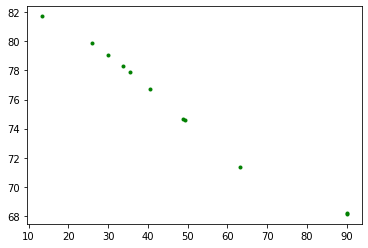

In [51]:
plt.plot(np.absolute(psi_ddd), xyz_diff, 'g.')

### *Check: Recalculating Spherical Coordinate Differences*
As a way of verifying that I didn't make any mistakes with my transformations, I decided to transform the cartesian coordinate differences back to spherical coordinates to see if they match the input data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Calculating the differences in longitude:*__

In [52]:
dlon = [] # creating an empty list to store data iteratively
for i in range(len(df4)): # iterating through data frame 4 (Adjusted Spherical Coordinates in DMS)
    diff_lon = (float(df4.iloc[i,3]) - float(df.iloc[i,3]))/3600 # the difference in longitude (Post-Adjustment - Pre-Adjustment)
    dlon.append(diff_lon) # adding data to list

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Calculating the differences in latitude:*__

In [53]:
dlat = [] # creating an empty list to store data iteratively
for i in range(len(df4)): # iterating through data frame 4 (Adjusted Spherical Coordinates in DMS)
    diff_lat = (float(df4.iloc[i,6]) - float(df.iloc[i,6]))/3600 # the difference in latitude (Post-Adjustment - Pre-Adjustment)
    dlat.append(diff_lat) # adding data to list

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __*Calculating the differences in height:*__

In [54]:
dh = [] # creating an empty list to store data iteratively
for i in range(len(df4)): # iterating through data frame 4 (Adjusted Spherical Coordinates in DMS)
    diff_h = float(df4.iloc[i,7]) - float(df.iloc[i,7]) # the difference in height (Post-Adjustment - Pre-Adjustment)
    dh.append(diff_h) # adding data to list

### Spherical Coordinate Differences in Decimal Degrees

In [55]:
df8 = pd.DataFrame({
    'Name':names,
    '$\Delta \lambda$°':dlon,
    '$\Delta \psi$°':dlat,
    '$\Delta h$(m)':dh
})
df8 # displaying the data frame

,Name,$\Delta \lambda$°,$\Delta \psi$°,$\Delta h$(m)
0,North Pole (NP),0.000417,0.000417,50.0
1,South Pole (NP),0.000417,0.000417,50.0
2,New Orleans (PoB),0.000417,0.000417,50.0
3,Eiffel Tower (1),0.000417,0.000417,50.0
4,Angkor Wat (2),0.000417,0.000417,50.0
5,Denali (3),0.000417,0.000417,50.0
6,Purdue Fountain (4),0.000417,0.000417,50.0
7,Cradle of Humankind (5),0.000417,0.000417,50.0
8,Sydney Opera House (6),0.000417,0.000417,50.0
9,Rapa Nui (7),0.000417,0.000417,50.0


The above results are exactly the same as the additional measurements, therefore, the transformations are correct.

## <span style="color:blue">*---- Lab 02 -----*<span>

### Adjustments to Lab 01 to be used in Lab 02 (Adding 1 degree)

In [56]:
lon_dd3 = [] 
for i in range(len(df)): 
    lon_new = (float(df.iloc[i,1]) + 1) 
    lon_dd3.append(lon_new) 

In [57]:
lat_dd3 = [] 
for i in range(len(df)): 
    lat_new = (float(df.iloc[i,4]) + 1) 
    lat_dd3.append(lat_new) 

In [58]:
df9 = pd.DataFrame({
    'Name':names,
    '$\lambda$dd':lon_dd3,
    '$\lambda$mm':lon_mm,
    '$\lambda$ss.sssss':lon_ss,
    '$\psi$dd':lat_dd3,
    '$\psi$mm':lat_mm,
    '$\psi$ss.sssss':lat_ss,
    '$h$ (m)':hh
})
df9 # displaying the data frame

,Name,$\lambda$dd,$\lambda$mm,$\lambda$ss.sssss,$\psi$dd,$\psi$mm,$\psi$ss.sssss,$h$ (m)
0,North Pole (NP),1.0,0,0.00000,91.0,0,0.00000,-4211.1040
1,South Pole (NP),1.0,0,0.00000,-89.0,0,-0.00000,2884.9448
2,New Orleans (PoB),-88.0,-57,-12.38369,31.0,2,36.78024,50.0000
3,Eiffel Tower (1),3.0,17,40.20111,49.0,51,29.64298,84.4424
4,Angkor Wat (2),104.0,52,0.43521,14.0,24,45.08764,114.9224
5,Denali (3),-150.0,0,-26.64532,64.0,4,10.20103,6239.8784
6,Purdue Fountain (4),-85.0,-54,-49.61418,41.0,25,43.10224,239.8904
7,Cradle of Humankind (5),28.0,46,2.57003,-24.0,-55,-31.39308,1531.6328
8,Sydney Opera House (6),152.0,12,51.01352,-32.0,-51,-31.09981,53.9624
9,Rapa Nui (7),-108.0,-6,-16.81564,-34.0,-36,-3.16718,556.8824


### Converting from DMS to Decimal Degrees

In [59]:
lam3 = [] 
for i in range(len(df9)): 
    lon_dec3 = int(df9.iloc[i,1]) + int(df9.iloc[i,2])/60 + float(df9.iloc[i,3])/3600 
    lam3.append(lon_dec3) 

In [60]:
psi3 = [] 
for i in range(len(df9)): 
    lat_dec3 = int(df9.iloc[i,4]) + int(df9.iloc[i,5])/60 + float(df9.iloc[i,6])/3600
    psi3.append(lat_dec3)

In [61]:
df10 = pd.DataFrame({
    'Name':names,
    '$\lambda$°':lam3,
    '$\psi$°':psi3,
    '$h$ (m)':hh
})
df10 # displaying the data frame

,Name,$\lambda$°,$\psi$°,$h$ (m)
0,North Pole (NP),1.000000,91.000000,-4211.1040
1,South Pole (NP),1.000000,-89.000000,2884.9448
2,New Orleans (PoB),-88.953440,31.043550,50.0000
3,Eiffel Tower (1),3.294500,49.858234,84.4424
4,Angkor Wat (2),104.866788,14.412524,114.9224
5,Denali (3),-150.007401,64.069500,6239.8784
6,Purdue Fountain (4),-85.913782,41.428640,239.8904
7,Cradle of Humankind (5),28.767381,-24.925387,1531.6328
8,Sydney Opera House (6),152.214170,-32.858639,53.9624
9,Rapa Nui (7),-108.104671,-34.600880,556.8824


### Converting from Decimal Degrees to Cartesian

In [70]:
cart3 = [] 
for i in range(len(df10)):
    Rh3 = R + np.float64(df10.iloc[i,3]) 
    mat3 = [np.cos(df10.iloc[i,2]*rad)*np.cos(df10.iloc[i,1]*rad), 
           np.cos(df10.iloc[i,2]*rad)*np.sin(df10.iloc[i,1]*rad), 
           np.sin(df10.iloc[i,2]*rad)]
    cc3 = np.multiply(Rh3,mat3) 
    cart3.append(cc3)

In [71]:
ef_x3 = []
ef_y3 = [] 
ef_z3 = [] 
for i in range(len(cart3)): 
    x3 = cart3[i][0] 
    y3 = cart3[i][1] 
    z3 = cart3[i][2] 
    ef_x3.append(x3) 
    ef_y3.append(y3) 
    ef_z3.append(z3) 

In [72]:
df11 = pd.DataFrame({
    'Name':names,
    '$X$(m)':ef_x3,
    '$Y$(m)':ef_y3,
    '$Z$(m)':ef_z3
})
df11

,Name,$X$(m),$Y$(m),$Z$(m)
0,North Pole (NP),-1.110989e+05,-1.939238e+03,6.365819e+06
1,South Pole (NP),1.112227e+05,1.941399e+03,-6.372914e+06
2,New Orleans (PoB),9.970007e+04,-5.457649e+06,3.285483e+06
3,Eiffel Tower (1),4.100529e+06,2.360401e+05,4.870386e+06
4,Angkor Wat (2),-1.583209e+06,5.964047e+06,1.585781e+06
5,Denali (3),-2.415216e+06,-1.394010e+06,5.735212e+06
6,Purdue Fountain (4),3.403994e+05,-4.764887e+06,4.215765e+06
7,Cradle of Humankind (5),5.065741e+06,2.781160e+06,-2.685625e+06
8,Sydney Opera House (6),-4.734682e+06,2.494819e+06,-3.456731e+06
9,Rapa Nui (7),-1.629781e+06,-4.984946e+06,-3.618129e+06


### Calculating the Cartesian Differences

In [73]:
dx2 = [] 
for i in range(len(df11)):
    del_x = df11.iloc[i,1] - df3.iloc[i,1] 
    dx2.append(del_x) 

In [74]:
dy2 = [] 
for i in range(len(df11)): 
    del_y = df11.iloc[i,2] - df3.iloc[i,2] 
    dy2.append(del_y) 

In [75]:
dz2 = [] 
for i in range(len(df11)): 
    del_z = df11.iloc[i,3] - df3.iloc[i,3] 
    dz2.append(del_z) 

In [76]:
df12 = pd.DataFrame({
    'Name':names,
    '$\Delta X$(m)':dx2,
    '$\Delta Y$(m)':dy2,
    '$\Delta Z$(m)':dz2
})
df12 

,Name,$\Delta X$(m),$\Delta Y$(m),$\Delta Z$(m)
0,North Pole (NP),-111098.864041,-1939.237885,-919.692787
1,South Pole (NP),111222.688307,1941.399246,920.773550
2,New Orleans (PoB),95218.416389,57373.703331,95790.436277
3,Eiffel Tower (1),-87768.813497,68223.369402,72462.010264
4,Angkor Wat (2),-97932.094129,-52631.906144,107945.081362
5,Denali (3),111119.465955,5934.380016,49586.612060
6,Purdue Fountain (4),79290.627217,77919.089925,84045.191265
7,Cradle of Humankind (5),-5474.501018,111100.173633,100426.166544
8,Sydney Opera House (6),-97885.726457,-52788.841254,92846.760549
9,Rapa Nui (7),65809.285143,-89663.212043,90950.806373


### Writing Data Frame to a Pickle File

In [77]:
df12.to_pickle("./xyz_1deg.pkl")